Alif Adhitya (202131126)

# Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar

In [2]:
image = cv2.imread("helm.jpg")

# Konversi gambar ke grayscale dan menjadikan binary thresholding

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Memproses dan mendeteksi kontur gambar

In [4]:
# berfungis mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# deteksi tepi menggunakan metode Canny pada citra yang sudah dikurangi noisenya
edges = cv2.Canny(blurred, 50, 150)

# mencari kontur pada citra tepi dan mengembalikan kontur
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# digunakan untuk membuat citra kosong dengan latar belakang putih.
result_with_bg = np.ones_like(image) * 255

# menjadikan warna kontur sebagai merah
cv2.drawContours(result_with_bg, contours, -1, (0, 0, 255), 2)

# membuat salinan citra asli yang akan digunakan untuk menggambar kontur
image_copy = image.copy()

# menggambar kontur pada citra image copy menggunakan fungsi cv2.drawContours()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

# Mengonversi citra image_copy dari mode warna BGR ke RGB
image_copy_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Menampilkan hasil dari proses deteksi

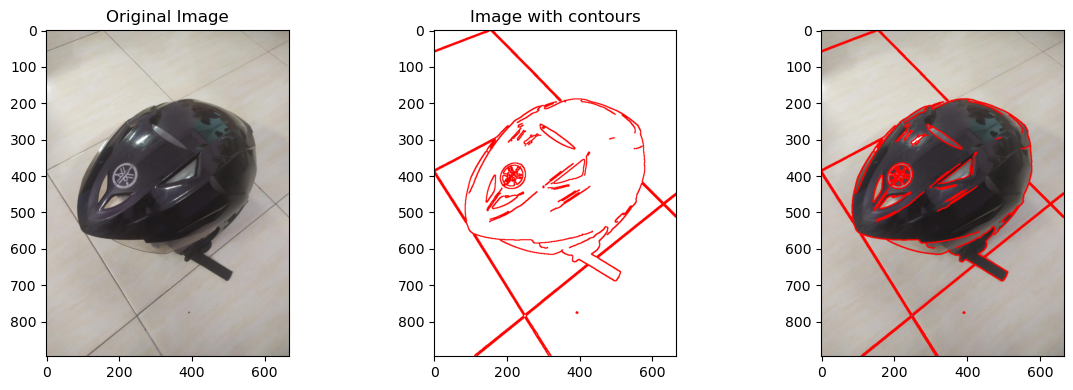

In [5]:
# Membuat sebuah figure dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Menampilkan citra asli image pada subplot pertama (indeks 0).
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")


# Menampilkan citra hasil dengan kontur yang terdeteksi 
axes[1].imshow(cv2.cvtColor(result_with_bg, cv2.COLOR_BGR2RGB))
axes[1].set_title("Image with contours")


# Menampilkan citra hasil dengan kontur yang terdeteksi pada citra asli
axes[2].imshow(image_copy_rgb)
axes[2].set_title(" ")

# membuat tampilan subplot lebih rapi
plt.tight_layout()

# menampilkan plot yang telah dibuat
plt.show()